# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import json
import requests
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
from citipy import citipy
import random
from datetime import datetime
import seaborn as sns

## Generate Cities List

In [2]:
cities = []

while len(cities)<600:
        lats = (random.choice(range(-90,90)))
        longs = (random.choice(range(-180,180)))
        city= citipy.nearest_city(lats,longs).city_name
        
        if city not in cities:
            cities.append(city)
len(cities)



600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
from api_keys_weather import api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
appid = api_key
settings = {"units": "imperial", "appid": api_key}
query_url = f"{url}appid={api_key}&units={units}&q="
response = requests.get(query_url + city).json()
response

{'coord': {'lon': 5.1352, 'lat': 61.9875},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 37.99,
  'feels_like': 28.94,
  'temp_min': 37.99,
  'temp_max': 37.99,
  'pressure': 1016,
  'humidity': 79},
 'visibility': 10000,
 'wind': {'speed': 16.06, 'deg': 42, 'gust': 19.37},
 'clouds': {'all': 14},
 'dt': 1619574371,
 'sys': {'type': 3,
  'id': 2003008,
  'country': 'NO',
  'sunrise': 1619580883,
  'sunset': 1619638734},
 'timezone': 7200,
 'id': 3146487,
 'name': 'Raudeberg',
 'cod': 200}

In [4]:
#city

In [5]:
#query_url

In [6]:
# set up lists to hold reponse info
lat = []
lon = []
temp = []
hum = []
cloud = []
wind = []
date = []
cit_num = 0
cit_name = []

In [7]:
# Loop through the list of cities and perform a request for data on each

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        cit_name.append(response['name'])
        cit_num = cit_num + 1
        
        print(f"Data found for city number: {cit_num}, city name: {response['name']}")
        
    except:
        print(f"City data for {city} not found. Move on to next.")
        
    

Data found for city number: 1, city name: Puerto Ayora
Data found for city number: 2, city name: Kaitangata
Data found for city number: 3, city name: Avarua
Data found for city number: 4, city name: New Norfolk
Data found for city number: 5, city name: Chui
Data found for city number: 6, city name: Gouré
Data found for city number: 7, city name: Ushuaia
Data found for city number: 8, city name: Petra
Data found for city number: 9, city name: Lubango
Data found for city number: 10, city name: Yellowknife
Data found for city number: 11, city name: Iskateley
Data found for city number: 12, city name: Nanortalik
Data found for city number: 13, city name: Ostrovnoy
City data for vaitupu not found. Move on to next.
Data found for city number: 14, city name: Punta Arenas
City data for toliary not found. Move on to next.
Data found for city number: 15, city name: Codrington
Data found for city number: 16, city name: Salmo
Data found for city number: 17, city name: Bambous Virieux
Data found fo

City data for tasbuget not found. Move on to next.
Data found for city number: 141, city name: Salym
Data found for city number: 142, city name: Mezen'
City data for babanusah not found. Move on to next.
Data found for city number: 143, city name: Papillion
Data found for city number: 144, city name: São João da Barra
Data found for city number: 145, city name: Tyrma
Data found for city number: 146, city name: Jatiroto
Data found for city number: 147, city name: Cavalcante
Data found for city number: 148, city name: Viseu
Data found for city number: 149, city name: Saint Paul Harbor
Data found for city number: 150, city name: Khatanga
Data found for city number: 151, city name: Beatrice
Data found for city number: 152, city name: Labuhan
Data found for city number: 153, city name: Ketchikan
Data found for city number: 154, city name: Morant Bay
Data found for city number: 155, city name: Qasigiannguit
Data found for city number: 156, city name: Ribeira Grande
City data for satitoa not 

Data found for city number: 278, city name: Baker City
Data found for city number: 279, city name: São Filipe
Data found for city number: 280, city name: Svit
Data found for city number: 281, city name: Poddor'ye
Data found for city number: 282, city name: Norman Wells
Data found for city number: 283, city name: Ortigueira
Data found for city number: 284, city name: Nouakchott
Data found for city number: 285, city name: Sinegorskiy
Data found for city number: 286, city name: Bahía Solano
Data found for city number: 287, city name: Shunyi
Data found for city number: 288, city name: Dubbo
Data found for city number: 289, city name: Kindu
Data found for city number: 290, city name: Vanavara
Data found for city number: 291, city name: Nelson Bay
Data found for city number: 292, city name: Safi
Data found for city number: 293, city name: Inyonga
Data found for city number: 294, city name: Dakar
Data found for city number: 295, city name: Tual
Data found for city number: 296, city name: Ambi

Data found for city number: 424, city name: Griffith
Data found for city number: 425, city name: Kisiwani
Data found for city number: 426, city name: Port-Cartier
Data found for city number: 427, city name: Mogocha
Data found for city number: 428, city name: Guerrero Negro
Data found for city number: 429, city name: Gympie
City data for tokzar not found. Move on to next.
Data found for city number: 430, city name: Casablanca
Data found for city number: 431, city name: Geraldton
Data found for city number: 432, city name: Mahibadhoo
Data found for city number: 433, city name: Yārāda
City data for sentyabrskiy not found. Move on to next.
Data found for city number: 434, city name: Olafsvik
Data found for city number: 435, city name: Flinders
Data found for city number: 436, city name: Menongue
Data found for city number: 437, city name: Jacqueville
Data found for city number: 438, city name: Brae
Data found for city number: 439, city name: Sayville
Data found for city number: 440, city n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict = {"City": cit_name, "Latitude": lat, "Longitude": lon,
"Max Temp": temp, "Humidity": hum, "Cloudiness": cloud, "Wind Speed": wind, "Date": date}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Puerto Ayora,-0.7393,-90.3518,75.31,90,42,6.69,1619574288
1,Kaitangata,-46.2817,169.8464,55.99,70,99,4.00,1619574177
2,Avarua,-21.2078,-159.7750,82.40,74,90,8.05,1619574166
3,New Norfolk,-42.7826,147.0587,64.00,70,97,3.00,1619574263
4,Chui,-33.6971,-53.4616,52.66,82,0,6.06,1619574372


In [9]:
weather_data.count()

City          548
Latitude      548
Longitude     548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Date          548
dtype: int64

In [10]:
weather_data.to_csv("WeatherPy.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
weather_data.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,20.908239,22.103512,59.752135,71.547445,55.541971,6.926186,1.619574e+09
std,33.229586,88.595075,18.426842,22.050290,40.443882,4.825781,1.105534e+02
min,-54.800000,-179.166700,14.590000,9.000000,0.000000,0.110000,1.619574e+09
25%,-6.473700,-54.784500,45.000000,61.750000,10.750000,3.425000,1.619574e+09
50%,26.997900,26.970500,62.580000,76.500000,74.500000,5.750000,1.619574e+09
75%,50.045875,100.378650,75.445000,88.000000,99.000000,9.667500,1.619574e+09
max,78.218600,178.416700,90.770000,100.000000,100.000000,27.560000,1.619575e+09


In [12]:
#  Get the indices of cities that have humidity over 100%.
try:
    res = next(x for x, val in enumerate(hum) if val > 100)

    print("The index of element just greater than 100 : "+ str(res))

except:
    print("There are no cities with humidity over 100")

There are no cities with humidity over 100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

R squared: 0.3688223024321676


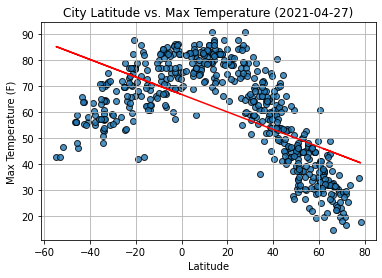

In [13]:
## Convert to floats and store as x and y values
x_values = weather_data['Latitude'].astype('float')
y_values = weather_data['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LatVsTemp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

R squared: 0.003790855791302325


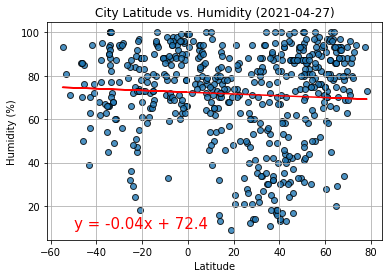

In [14]:
## Convert to floats and store as x and y values
x_values = weather_data['Latitude'].astype('float')
y_values = weather_data['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LatVsHum.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

R squared: 0.010764125825808374


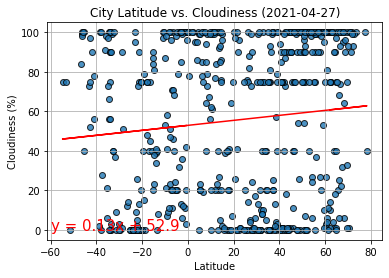

In [15]:
## Convert to floats and store as x and y values
x_values = weather_data['Latitude'].astype('float')
y_values = weather_data['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-60,0),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LatVsCloud.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

R squared: 0.010383801662254496


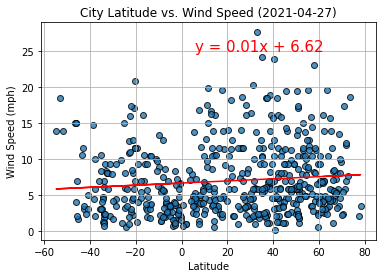

In [16]:
# Convert to floats and store as x and y values
x_values = weather_data['Latitude'].astype('float')
y_values = weather_data['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LatVsWind.png")

# Show plot
plt.show()

## Linear Regression

In [17]:
north = weather_data.loc[weather_data["Latitude"] >= 0]
south = weather_data.loc[weather_data["Latitude"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.8141766222454405


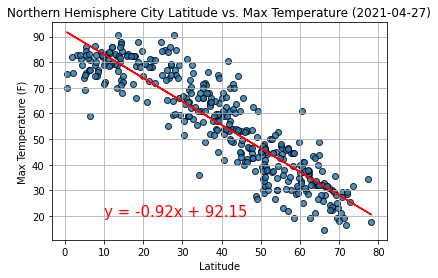

In [32]:
## Convert to floats and store as x and y values
x_values = north['Latitude'].astype('float')
y_values = north['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Northern Hemisphere City Latitude vs. Max Temperature ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("NorthLatVsTemp.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.44873182066117956


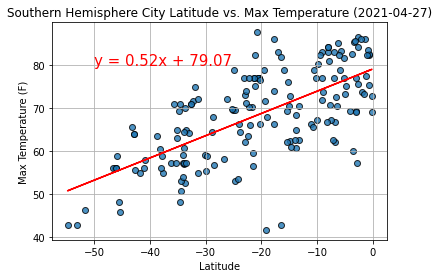

In [33]:
## Convert to floats and store as x and y values
x_values = south['Latitude'].astype('float')
y_values = south['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Southern Hemisphere City Latitude vs. Max Temperature ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("SouthLatVsTemp.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.021182866647304677


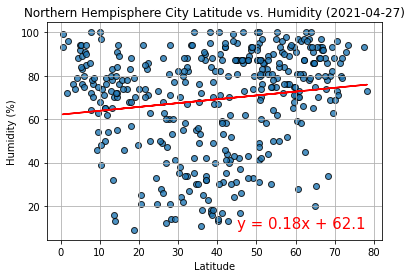

In [35]:
## Convert to floats and store as x and y values
x_values = north['Latitude'].astype('float')
y_values = north['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hempisphere City Latitude vs. Humidity ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("NorthLatVsHum.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.02499620362962598


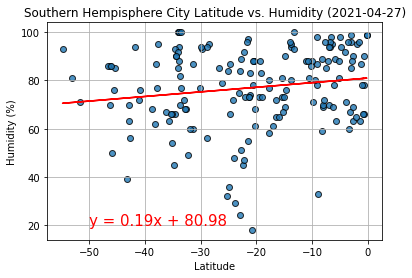

In [36]:
## Convert to floats and store as x and y values
x_values = south['Latitude'].astype('float')
y_values = south['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hempisphere City Latitude vs. Humidity ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("SouthLatVsHum.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.008923009144622684


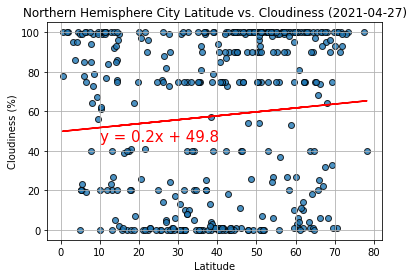

In [37]:
## Convert to floats and store as x and y values
x_values = north['Latitude'].astype('float')
y_values = north['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,45),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere City Latitude vs. Cloudiness ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("NorthLatVsCloud.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 4.134369760754091e-05


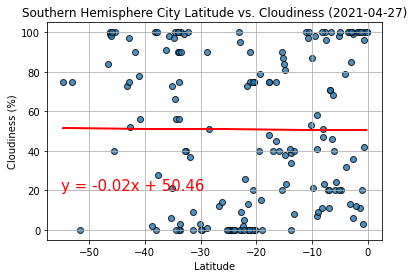

In [38]:
## Convert to floats and store as x and y values
x_values = south['Latitude'].astype('float')
y_values = south['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere City Latitude vs. Cloudiness ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("SouthLatVsCloud.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.0012106860972253425


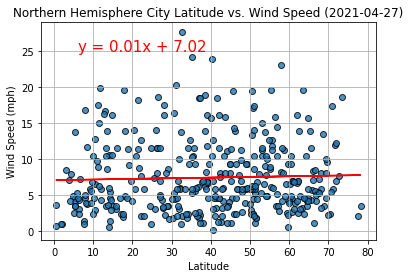

In [24]:
# Convert to floats and store as x and y values
x_values = north['Latitude'].astype('float')
y_values = north['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere City Latitude vs. Wind Speed ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("NorthLatVsWind.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.06465626388108092


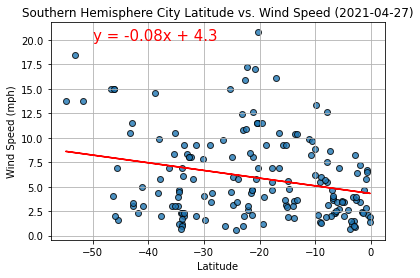

In [39]:
# Convert to floats and store as x and y values
x_values = south['Latitude'].astype('float')
y_values = south['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere City Latitude vs. Wind Speed ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("SouthLatVsWind.png")

# Show plot
plt.show()